##Importing Libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
x_train=train_datagen.flow_from_directory(r"D:/Rajavarman/Documents/GitHub/IBM-Project-37872-1660358144/Dataset Plant Disease/Veg-dataset",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 14802 images belonging to 1 classes.


In [5]:
x_test=test_datagen.flow_from_directory(r"D:/Rajavarman/Documents/GitHub/IBM-Project-37872-1660358144/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)


Found 3416 images belonging to 9 classes.


##Adding Layers

In [6]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(9,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [8]:
len(x_train)

617

In [9]:
1238/24

51.583333333333336

In [10]:

model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
617/617 [==============================] - 698s 1s/step - loss: 32225192.0000 - accuracy: 0.1443 - val_loss: 7807344.0000 - val_accuracy: 0.1232
Epoch 2/10
617/617 [==============================] - 454s 736ms/step - loss: 454056576.0000 - accuracy: 0.1119 - val_loss: 103023512.0000 - val_accuracy: 0.1232
Epoch 3/10
617/617 [==============================] - 412s 667ms/step - loss: 1904505216.0000 - accuracy: 0.1096 - val_loss: 355165056.0000 - val_accuracy: 0.0943
Epoch 4/10
617/617 [==============================] - 411s 667ms/step - loss: 3956936704.0000 - accuracy: 0.1124 - val_loss: 636447616.0000 - val_accuracy: 0.1953
Epoch 5/10
617/617 [==============================] - 495s 802ms/step - loss: 7451285504.0000 - accuracy: 0.1125 - val_loss: 1182241024.0000 - val_accuracy: 0.1232
Epoch 6/10
617/617 [==============================] - 414s 671ms/step - loss: 10825168896.0000 - accuracy: 0.1107 - val_loss: 1667315840.0000 - val_accuracy: 0.0152
Epoch 7/10
617/617 [=======

##Test and save the model

In [11]:
model.save('vegetabledata.h5')
model=load_model('vegetabledata.h5')

In [13]:
img=image.load_img(r"D:/Rajavarman/Documents/GitHub/IBM-Project-37872-1660358144/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b475147c-92bc-419a-b2c3-7d5aabbb79ec___RS_Early.B 7379.JPG")

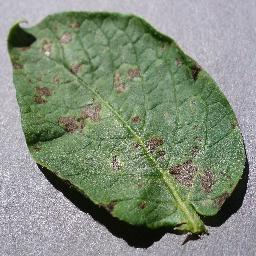

In [14]:
img=image.load_img(r"D:/Rajavarman/Documents/GitHub/IBM-Project-37872-1660358144/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b475147c-92bc-419a-b2c3-7d5aabbb79ec___RS_Early.B 7379.JPG")
img

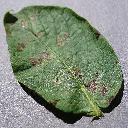

In [15]:
x=image.img_to_array(img)
img=image.load_img(r"D:/Rajavarman/Documents/GitHub/IBM-Project-37872-1660358144/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b475147c-92bc-419a-b2c3-7d5aabbb79ec___RS_Early.B 7379.JPG",target_size=(128,128))
img

In [16]:
x=image.img_to_array(img)
x

array([[[191., 189., 200.],
        [189., 187., 198.],
        [189., 187., 198.],
        ...,
        [178., 176., 190.],
        [183., 181., 195.],
        [174., 172., 186.]],

       [[184., 182., 193.],
        [192., 190., 201.],
        [195., 193., 204.],
        ...,
        [181., 179., 193.],
        [191., 189., 203.],
        [173., 171., 185.]],

       [[184., 182., 193.],
        [192., 190., 201.],
        [197., 195., 206.],
        ...,
        [174., 172., 186.],
        [183., 181., 195.],
        [171., 169., 183.]],

       ...,

       [[163., 161., 172.],
        [176., 174., 185.],
        [159., 157., 168.],
        ...,
        [158., 156., 167.],
        [131., 130., 138.],
        [145., 144., 152.]],

       [[171., 169., 180.],
        [167., 165., 176.],
        [174., 172., 183.],
        ...,
        [137., 135., 146.],
        [134., 133., 141.],
        [185., 184., 192.]],

       [[157., 155., 166.],
        [224., 222., 233.],
        [204., 2

In [17]:
x=np.expand_dims(x,axis=0)
x

array([[[[191., 189., 200.],
         [189., 187., 198.],
         [189., 187., 198.],
         ...,
         [178., 176., 190.],
         [183., 181., 195.],
         [174., 172., 186.]],

        [[184., 182., 193.],
         [192., 190., 201.],
         [195., 193., 204.],
         ...,
         [181., 179., 193.],
         [191., 189., 203.],
         [173., 171., 185.]],

        [[184., 182., 193.],
         [192., 190., 201.],
         [197., 195., 206.],
         ...,
         [174., 172., 186.],
         [183., 181., 195.],
         [171., 169., 183.]],

        ...,

        [[163., 161., 172.],
         [176., 174., 185.],
         [159., 157., 168.],
         ...,
         [158., 156., 167.],
         [131., 130., 138.],
         [145., 144., 152.]],

        [[171., 169., 180.],
         [167., 165., 176.],
         [174., 172., 183.],
         ...,
         [137., 135., 146.],
         [134., 133., 141.],
         [185., 184., 192.]],

        [[157., 155., 166.],
       

In [18]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 262ms/step


In [19]:
x_train.class_indices

{'Veg-dataset': 0}

In [20]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

'Potato___Early_blight'

In [21]:
img=image.load_img(r"D:/Rajavarman/Documents/GitHub/IBM-Project-37872-1660358144/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b475147c-92bc-419a-b2c3-7d5aabbb79ec___RS_Early.B 7379.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 54ms/step


'Potato___Early_blight'